In [1]:
import numpy as np
import networkx as nx
import netrw
import matplotlib.pyplot as plt

def run_rewiring(G0,T,method, **kwargs):
    G = [G0]
    for t in range(1,T):
        G.append(method.step_rewire(G[-1], **kwargs))
    return G

def basic_metrics(G):
    # G: a single networkx object
    n = G.number_of_nodes()
    m = G.number_of_edges()
    l = average_shortest_path_length(G)
    NC = nx.number_connected_components(G)
    rho = nx.assortativity.degree_assortativity_coefficient(G)
    k = np.array(list(dict(nx.degree(G)).values()))
    k2 = np.sum(k**2)/n
    kmin = np.min(k)
    kmax = np.max(k)
    c = average_local_clustering(G)
    return n,m,l,NC,rho,k2,kmin,kmax,c

def gather_metrics_over_time(G):
    # G: a list of networkx objects
    T = len(G)
    n_ = np.zeros(T,dtype=int)
    m_ = np.zeros(T,dtype=int)
    l_ = np.zeros(T)
    NC_ = np.zeros(T,dtype=int)
    rho_ = np.zeros(T)
    k2_ = np.zeros(T)
    kmin_ = np.zeros(T)
    kmax_ = np.zeros(T)
    c_ = np.zeros(T)
    for t,g in enumerate(G):
        n_[t],m_[t],l_[t],NC_[t],rho_[t],k2_[t],kmin_[t],kmax_[t],c_[t] = basic_metrics(g)
    return n_,m_,l_,NC_,rho_,k2_,kmin_,kmax_,c_

def average_local_clustering(G):
    k = np.array(list(dict(nx.degree(G)).values()))
    n_kg1 = np.sum(k>1)
    clu = nx.clustering(G)
    tot = np.sum(list(nx.clustering(G).values()))
    barc = tot/n_kg1
    return barc

def average_shortest_path_length(G):
    C = list(nx.connected_components(G))
    Nv = list(map(len,C))
    Npairs = np.sum([N*(N-1)/2 for N in Nv])
    total = np.sum([np.sum(list(v[1].values())) for v in nx.all_pairs_shortest_path_length(G)])
    barl = total/Npairs
    return barl

In [3]:
n = 100
m = 2
G0 = nx.barabasi_albert_graph(n,m)

T = 1000

p = 0.8
method = netrw.rewire.DegreeAssortativeRewirer()
assortative = True
G = run_rewiring(G0,T,method, p=p,assortative=assortative)

n_,m_,l_,NC_,rho_,k2_,kmin_,kmax_,c_ = gather_metrics_over_time(G)

names = ['Number of nodes',
         'Number of edges',
         'Average shortest path length',
         'Number of components',
         'Degree correlation coefficient',
         'Second moment of degree distribution',
         'Minimum degree',
         'Maximum degree',
         'Average local clustering coefficient']

props = [n_,m_,l_,NC_,rho_,k2_,kmin_,kmax_,c_]

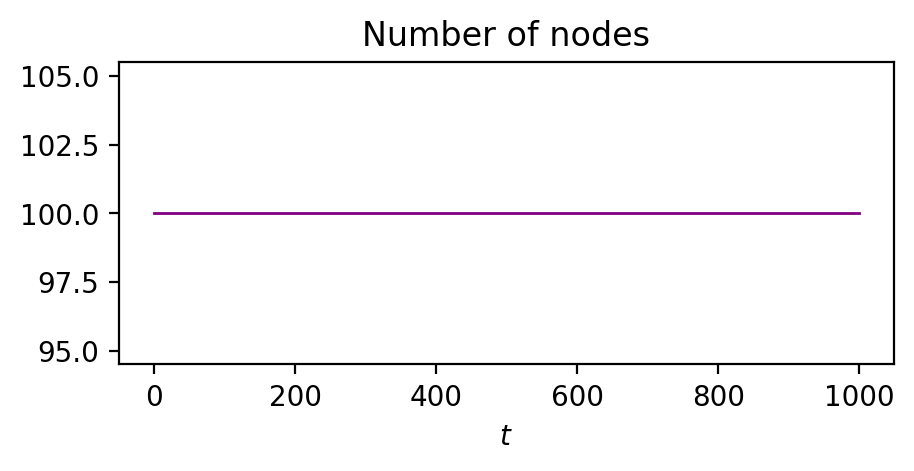

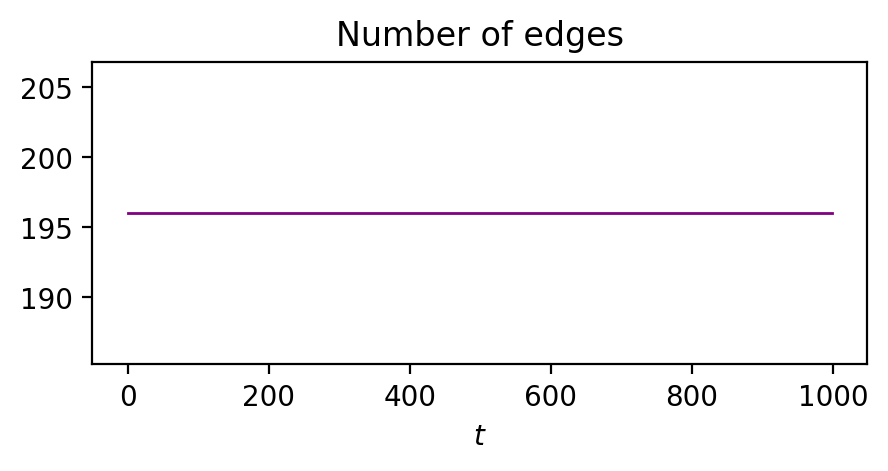

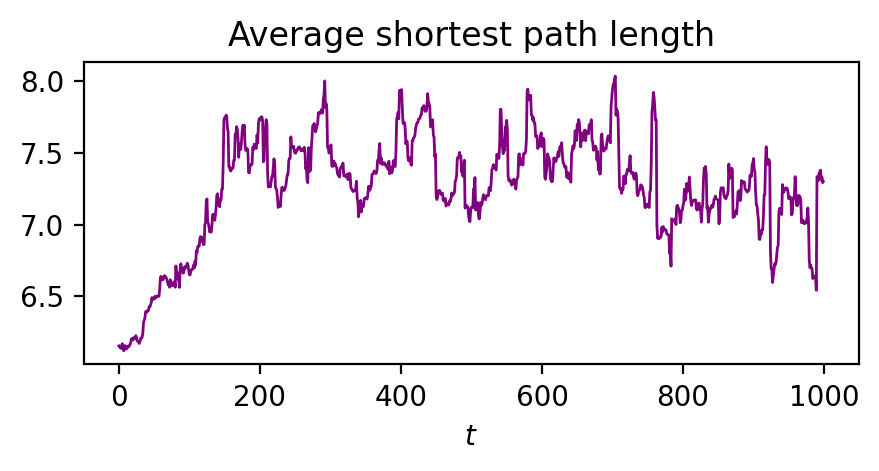

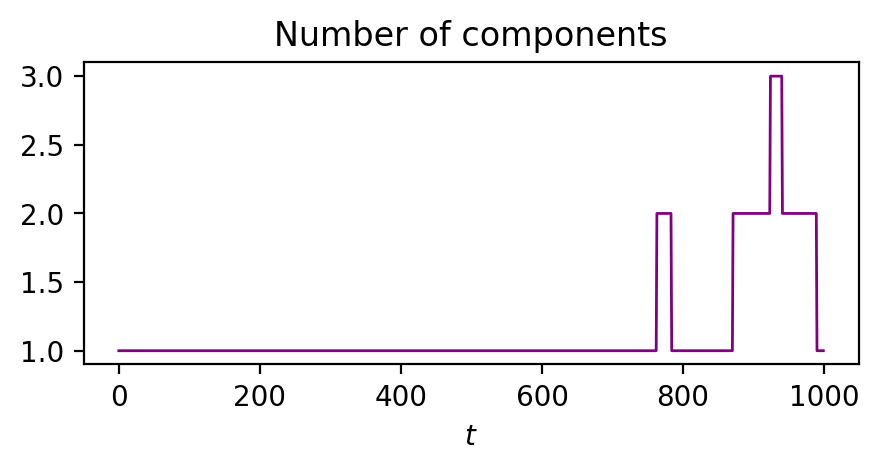

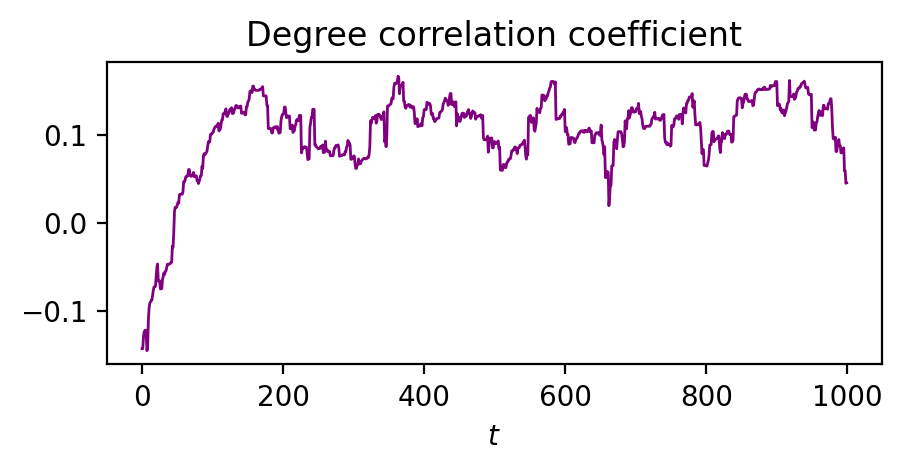

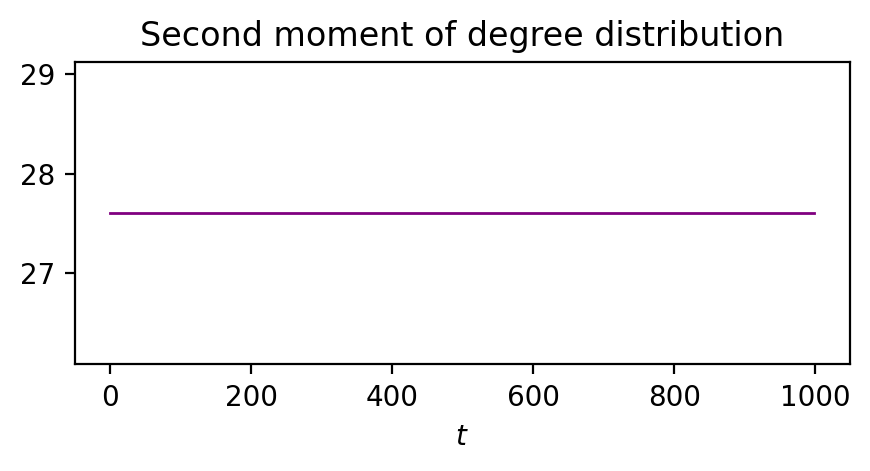

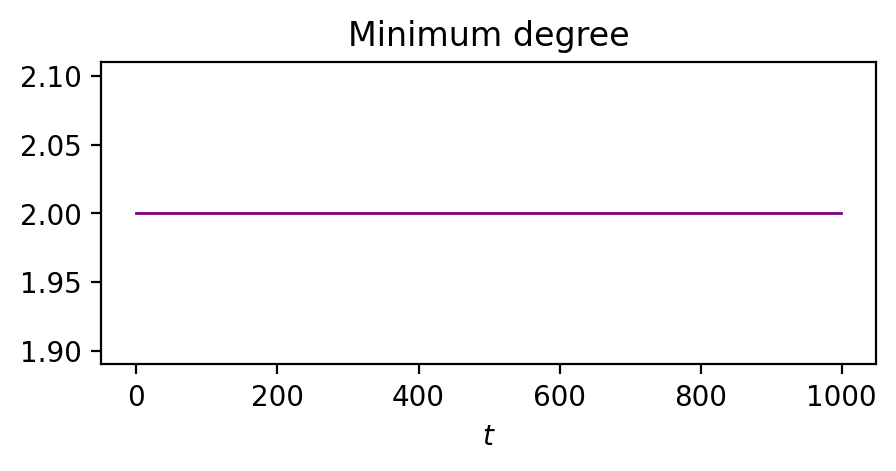

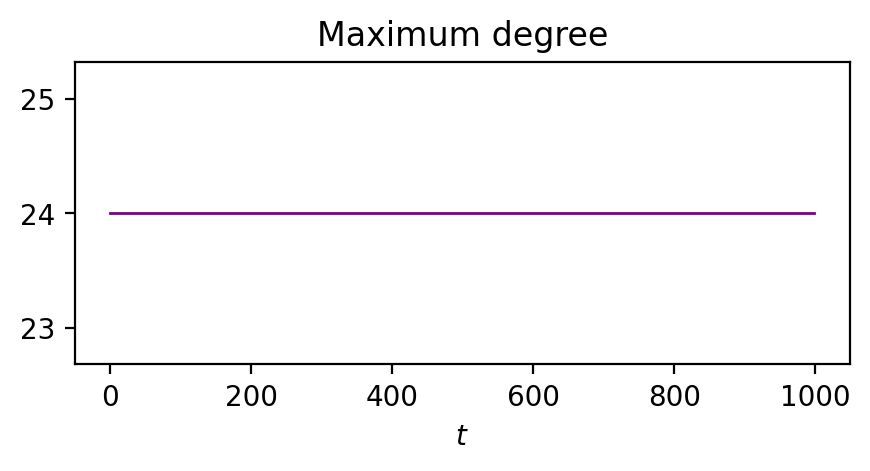

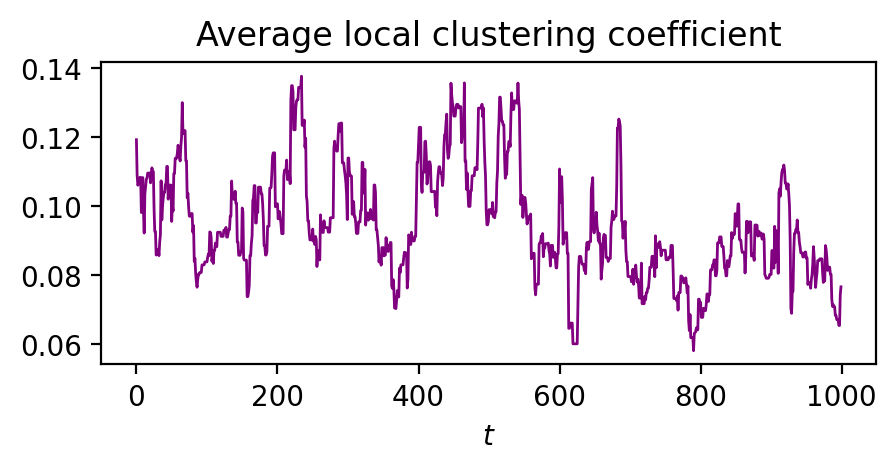

In [4]:
for j,(prop,name) in enumerate(zip(props,names)):
    fi,ax = plt.subplots(1,figsize=(5,2),dpi=200)
    plt.plot(range(T),prop,lw=1,color='purple')
    plt.title(name)
    plt.xlabel('$t$')
    plt.show()